## Results ResNet50 fully trainable

* ImageNet weights as initializytion weights
* all layers trainable


In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
import sklearn
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from tensorflow.keras.applications import ResNet50


In [2]:
img_height=224
img_width=224
batch_size=32

In [3]:
#load test data

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'E:\Babette\MasterThesis\GoldStandard_tvt\test',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )


Found 2622 files belonging to 2 classes.


In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'E:\Babette\MasterThesis\GoldStandard_tvt\train',
  #r'GoldStandard_tvt/train',
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8392 files belonging to 2 classes.


['0_layout', '1_Genuine']


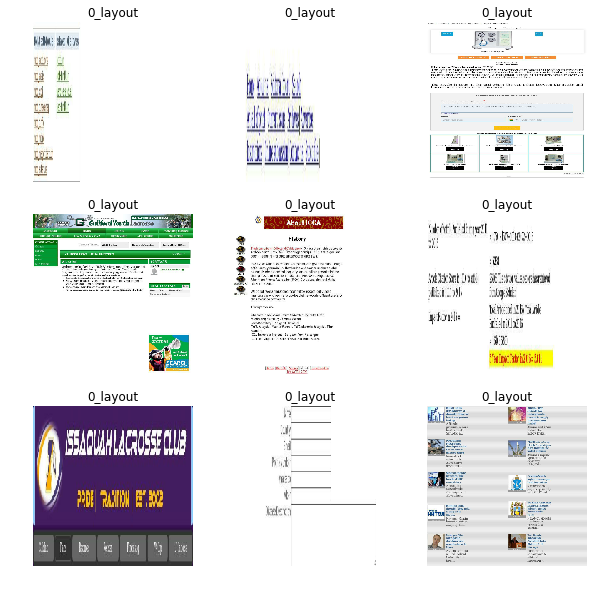

In [6]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:

# create resnet model w imgnet weights
resnet_model = ResNet50(weights='imagenet', 
                        include_top=False, 
                        input_shape=(224, 224, 3),
                        pooling= None)
for layer in resnet_model.layers:
  if isinstance(layer, BatchNormalization):
      layer.trainable = True
  else:
      layer.trainable = True

model= Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))


In [8]:
#Initiate Model

model.load_weights(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\resnet_model1_finetuned.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [9]:
val_acc = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\val_acc_history.npy')
acc = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\acc_history.npy')
val_loss = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\val_loss_history.npy')
loss = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\loss_history.npy')

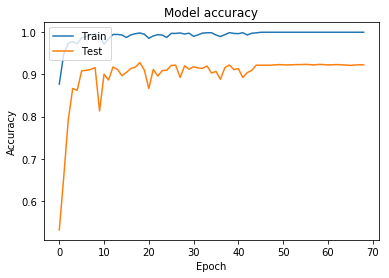

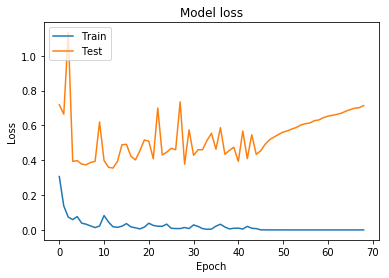

In [11]:
# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [4]:
label=[]
for element in test_ds.as_numpy_iterator():
    for x in element[1]:
        label.append(np.around(x).astype(int))



In [10]:
test_ids = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\ids_test.npy')
#df=df[['id', 'label']]
test_ids

33

In [16]:
test_ds.class_names



['0_layout', '1_Genuine']

In [20]:
#Predictions on test set

#y_pred = np.around(model.predict(test_ds)).astype(int)
#np.save(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\predictions.npy', y_pred)
y_pred = np.load(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\predictions.npy')


In [17]:
label_np= np.around(label).astype(int)

In [26]:
type(label)
#df = pd.DataFrame({'id': test_ids, 'y_test':label, 'y_pred': y_pred.flatten()} ) 
#df.to_pickle(r'E:\Babette\MasterThesis\McNemarTest\ResNet_finetuned.pkl')

In [24]:
report = skm.classification_report(label, y_pred, digits=4 )
print(report) 


              precision    recall  f1-score   support

           0     0.9367    0.9234    0.9300      1267
           1     0.9294    0.9417    0.9355      1355

   micro avg     0.9329    0.9329    0.9329      2622
   macro avg     0.9331    0.9326    0.9328      2622
weighted avg     0.9329    0.9329    0.9329      2622



In [20]:
report = skm.classification_report(label, y_pred, digits=2 )
print(report) 


              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1267
           1       0.93      0.94      0.94      1355

   micro avg       0.93      0.93      0.93      2622
   macro avg       0.93      0.93      0.93      2622
weighted avg       0.93      0.93      0.93      2622



In [29]:
#confusion Matrix
cm = skm.confusion_matrix(label, y_pred)
print(cm)


[[1170   97]
 [  79 1276]]


In [28]:
y_test= label
print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=1))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=1))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=1))



print('F1 score: ')
print(skm.f1_score(y_test, y_pred, pos_label=0))
print('Precision: ')
print(sklearn.metrics.precision_score(y_test, y_pred, pos_label=0))
print('Recall:')
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0))


F1 score: 
0.935483870967742
Precision: 
0.9293517844136926
Recall:
0.9416974169741698
F1 score: 
0.9300476947535771
Precision: 
0.9367493995196157
Recall:
0.9234411996842936


In [26]:
sklearn.metrics.accuracy_score(label, y_pred)

0.9328756674294432

In [21]:

false=[]
for i in range(len(y_pred)):
    if y_pred[i]!= label[i]:
        false.append(test_ids[i])
len(false)

np.save(r'E:\Babette\MasterThesis\Models\ResNet_imgnet_trainable_full\false_id.npy', false)


In [ ]:
# load model trained before
#model.load_weights('E:\Babette\MasterThesis\Models\Binary_CNN_model_3.h5')